# Analysis of Yelp Business Intelligence Data

###### I will analyze a subset of Yelp's business, reviews and user data. 
###### This dataset is pulled from Kaggle into a publis s3 bucket:

In [44]:
%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1589847285441_0001,pyspark,idle,Link,Link,✔


## Part I: Installation and Initial Setup

### Importing packages

In [45]:
sc.list_packages()
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from matplotlib.pyplot import figure
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



### Loading Data
###### Using spark load the data from S3 into a dataframe object 
###### that I can manipulate further down in the analysis.

In [46]:
df = spark.read.json('s3://sta9760-spark-data-set/yelp/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Overview of the Yelp Business Data set

In [47]:
#Total columns
f"Columns:{len(df.dtypes)}|Rows:{(df.count())}"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Columns:14|Rows:209393'

In [48]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [49]:
#First way in Pyspark
df.select('business_id', 'name', 'city', 'state', 'stars', 'categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+
only showing top 5 rows

## Part II:  Analyzing Categories

### Total Unique Categories

how many unique categories are represented in this dataset?

An association table is created to map a single business id multiple times to each distinct category

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import mean, stddev, col, abs, split, explode
import pyspark.sql.functions as f

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
df = df.select('business_id','categories').withColumn("categories", explode(split("categories", ", ")))
print(df.groupBy('categories').count().show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|         categories|count|
+-------------------+-----+
|     Paddleboarding|   36|
|     Dermatologists|  341|
|   Historical Tours|   54|
|   Hot Air Balloons|   21|
|Mobile Home Dealers|   16|
|      Data Recovery|  195|
|      Videographers|  169|
|      Skating Rinks|  104|
|             Fondue|   54|
|    Pet Photography|   49|
|  Pet Waste Removal|   34|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|       Aerial Tours|   28|
|  Signature Cuisine|    1|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

None

In [52]:
num_of_unique_categories = df.select("categories").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
print(f'Number of Unique Categories: {num_of_unique_categories}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Unique Categories: 1336

###### What are the top 20 most popular categories available?

### Bar Chart of Top 20 Categories By Business

### Loading Yelp User Review Data

In [54]:
review = spark.read.json('s3://sta9760-spark-data-set/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
print(review.printSchema())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

None

In [56]:
df_groupby = df.groupBy('categories').count()
df_categories_top20 = df_groupby.sort("count", ascending=False).limit(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

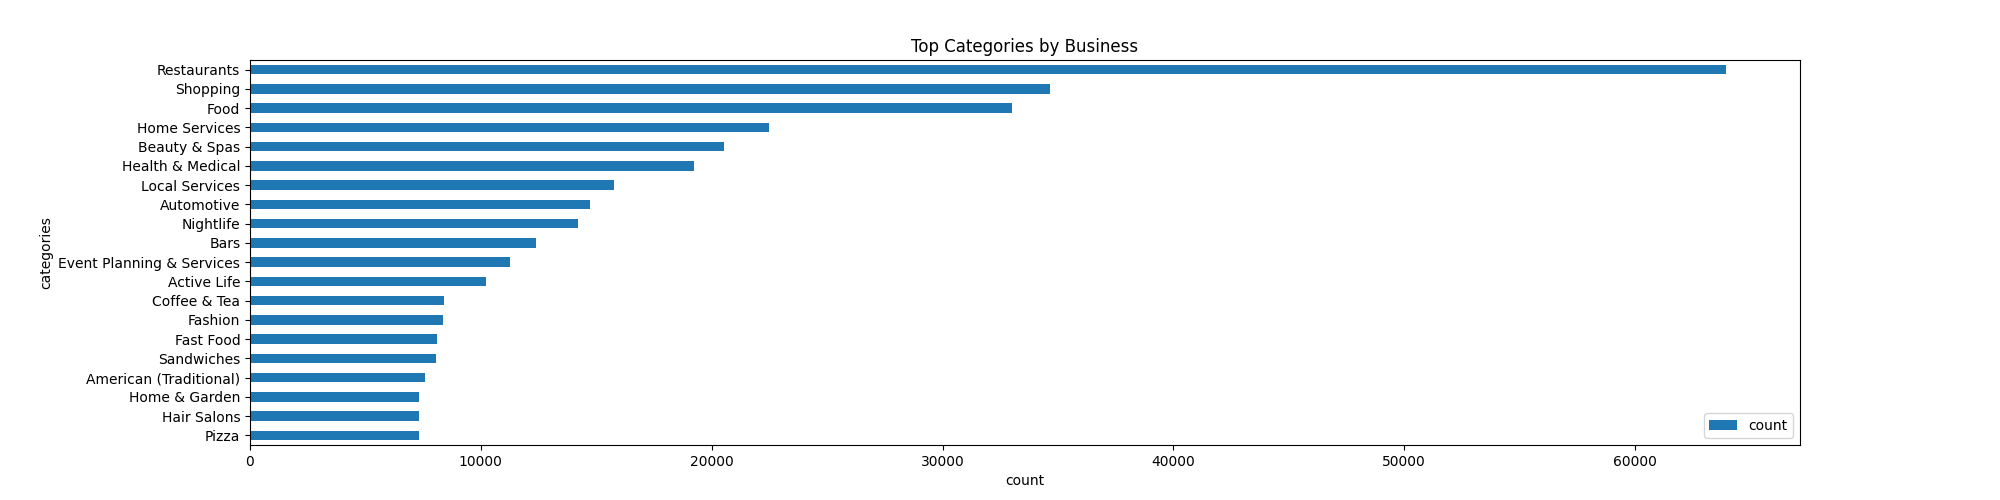

In [57]:
df_categories_top20_pandas = df_categories_top20.toPandas().set_index('categories')

# plot
df_categories_top20_pandas.plot.barh().invert_yaxis()
plt.title('Top Categories by Business')
plt.xlabel("count")
plt.ylabel("categories")
plt.rcParams["figure.figsize"] = [20, 5]

%matplot plt

## Part III: Do Yelp Reviews Skew Negative?

### Loading Review Data

Begin by loading the review data set from S3 and printing schema to determine what data is available.

In [58]:
review = spark.read.json('s3://sta9760-spark-data-set/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [60]:
review.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who took the time to submit a written review.

In [61]:
avg_stars = review.groupBy('business_id').agg(mean('stars'))
avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

In [62]:
business = spark.read.json('s3://sta9760-spark-data-set/yelp/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

In [63]:
join_review_business=business.join(avg_stars, on=['business_id'], how='inner')
join = join_review_business.select('avg(stars)','stars','name','city','state')
join.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+
|        avg(stars)|stars|                name|       city|state|
+------------------+-----+--------------------+-----------+-----+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|
+------------------+-----+--------------------+-----------+-----+
only showing top 5 rows

### Yelp Reviews Skewness

formula: (row['avg(stars)'] - row['stars']) / row['stars']

If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [64]:
review_skew = join_review_business.withColumn("skew",(join_review_business['avg(stars)']-join_review_business['stars'])/join_review_business['stars']).select('avg(stars)','stars','name','city','state','skew')
                                              

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
review_skew_panda=review_skew.select('skew').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

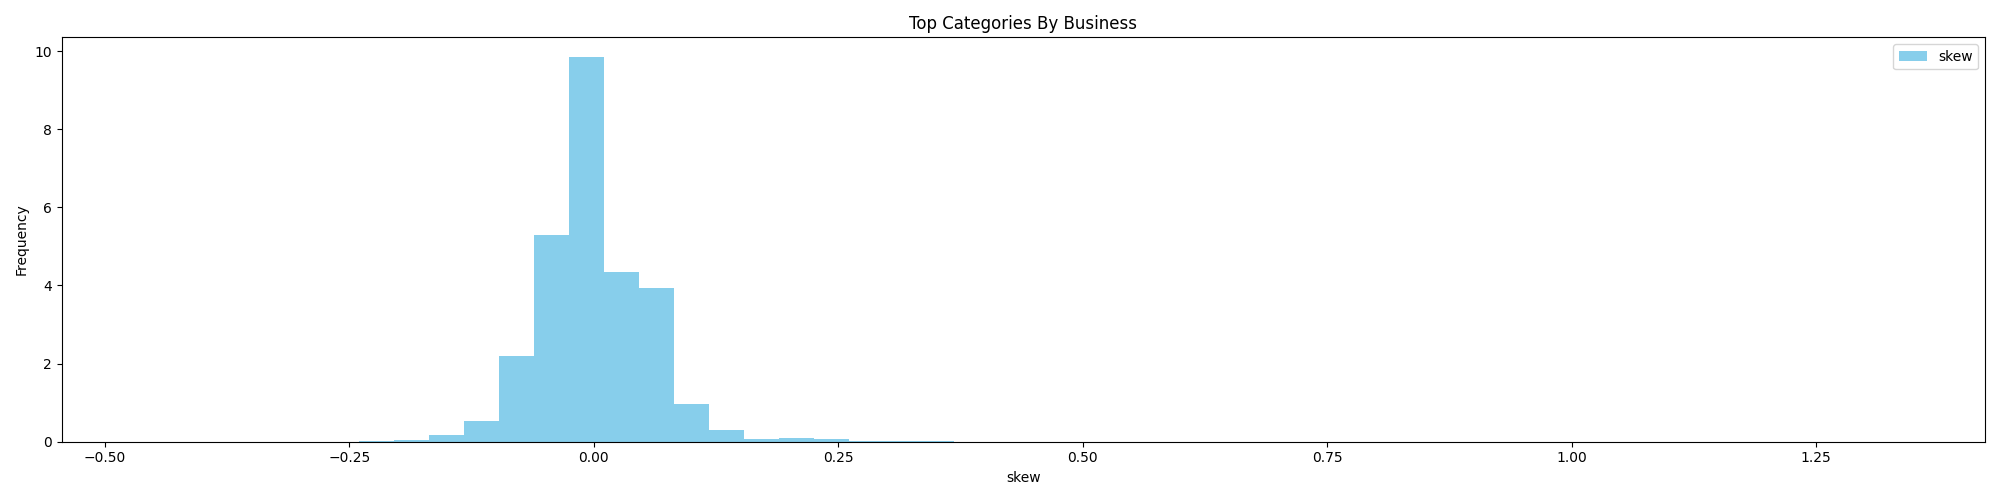

In [66]:
review_skew_panda.plot(kind='hist',bins=50,density=True, color = 'skyblue')
plt.xlabel('skew')
plt.title('Top Categories By Business')
plt.tight_layout()
%matplot plt

In [67]:
review_skew_panda.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                skew
count  209393.000000
mean        0.001235
std         0.055235
min        -0.454545
25%        -0.033898
50%         0.000000
75%         0.035714
max         1.333333

If we look at the shape of the plot above, the plot is pretty close to a normal distribution. So I would not say the Yelp written review is negatively skewed. That means reviewers who left a written response were not more dissatisfied than normal.

# Part IV - How is the average star between elite vs non-elite in top 20 states?

In [68]:
user=spark.read.json('s3://sta9760-spark-data-set/yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [69]:
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [70]:
business = business.select('business_id', 'city', 'state', 'stars').withColumnRenamed('stars', 'business_stars')
review = review.select('business_id', 'date', 'review_id', 'user_id', 'stars').withColumnRenamed('stars', 'review_stars')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [71]:
join_business_review = business.join(review, on = ['business_id'], how = 'inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
join_business_review_user = join_business_review.join(user, on = ['user_id'], how = 'inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
final = join_business_review_user.select('city', 'state', 'date', 'business_stars', 'review_stars','business_id','user_id','elite').sort('business_id','user_id')
final.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+-------------------+--------------+------------+--------------------+--------------------+---------+
|   city|state|               date|business_stars|review_stars|         business_id|             user_id|    elite|
+-------+-----+-------------------+--------------+------------+--------------------+--------------------+---------+
|Calgary|   AB|2016-08-16 00:27:50|           4.0|         4.0|--1UhMGODdWsrMast...|1b4rlFFdNfeysOjbr...|         |
|Calgary|   AB|2017-07-26 17:27:49|           4.0|         5.0|--1UhMGODdWsrMast...|4YHZzwlxEMi7zWO6O...|         |
|Calgary|   AB|2016-06-13 19:01:34|           4.0|         3.0|--1UhMGODdWsrMast...|A4bpHuvzaQt9-XAg8...|         |
|Calgary|   AB|2016-11-14 20:09:54|           4.0|         4.0|--1UhMGODdWsrMast...|BgTWMo2qRrXINPiM3...|2017,2018|
|Calgary|   AB|2018-05-06 04:22:48|           4.0|         1.0|--1UhMGODdWsrMast...|Bsy9F-59sl9OT_bvZ...|         |
|Calgary|   AB|2018-01-11 19:55:31|           4.0|         5.0|--1UhMGOD

In [100]:
final.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- date: string (nullable = true)
 |-- business_stars: double (nullable = true)
 |-- review_stars: double (nullable = true)
 |-- business_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- elite: string (nullable = true)

In [101]:
non_elite = final.filter(final.elite == '')
elite = final.filter(final.elite != '')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [102]:
f"Columns:{len(elite.columns)}|Rows: {(elite.count())}"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Columns:8|Rows: 1756327'

In [103]:
f"Columns:{len(non_elite.columns)}|Rows: {(non_elite.count())}"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Columns:8|Rows: 6264795'

In [104]:
non_elite.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- date: string (nullable = true)
 |-- business_stars: double (nullable = true)
 |-- review_stars: double (nullable = true)
 |-- business_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- elite: string (nullable = true)

In [105]:
non_elite = non_elite.groupBy('state').agg(mean('review_stars'))
non_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------------+
|state| avg(review_stars)|
+-----+------------------+
|   AZ|3.6908159912815623|
|   SC|  3.54002791690615|
|   OR|               2.0|
|   VA|1.5416666666666667|
|   QC| 3.799846803769556|
+-----+------------------+
only showing top 5 rows

#### How is the average star of non-elite in top 20 states?

In [107]:
non_elite = non_elite.sort("state", ascending=False).limit(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

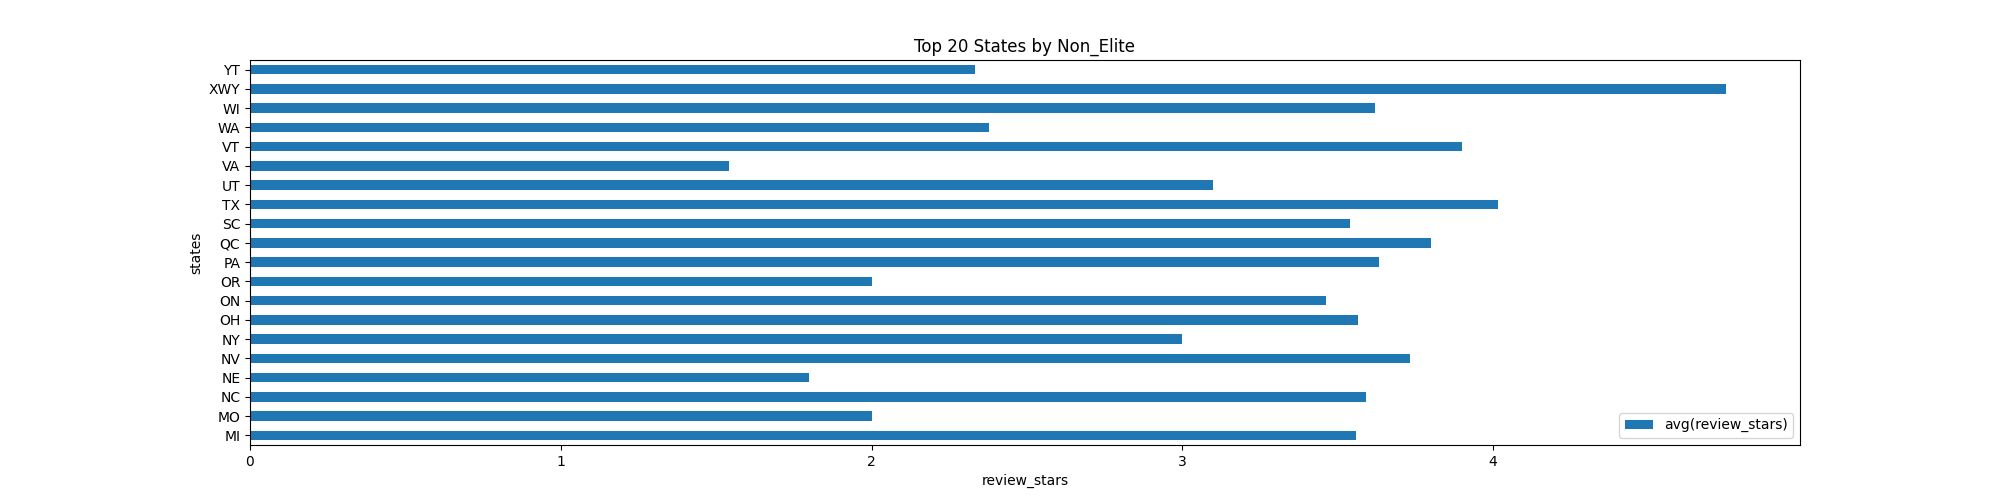

In [108]:
non_elite_pandas = non_elite.toPandas().set_index('state')

# plot
non_elite_pandas.plot.barh().invert_yaxis()
plt.title('Top 20 States by Non_Elite')
plt.xlabel("review_stars")
plt.ylabel("states")
plt.rcParams["figure.figsize"] = [20, 5]

%matplot plt

#### How is the average star of elite in top 20 states?

In [110]:
elite=elite.groupBy('state').agg(mean('review_stars'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [111]:
elite = elite.sort("state", ascending=False).limit(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

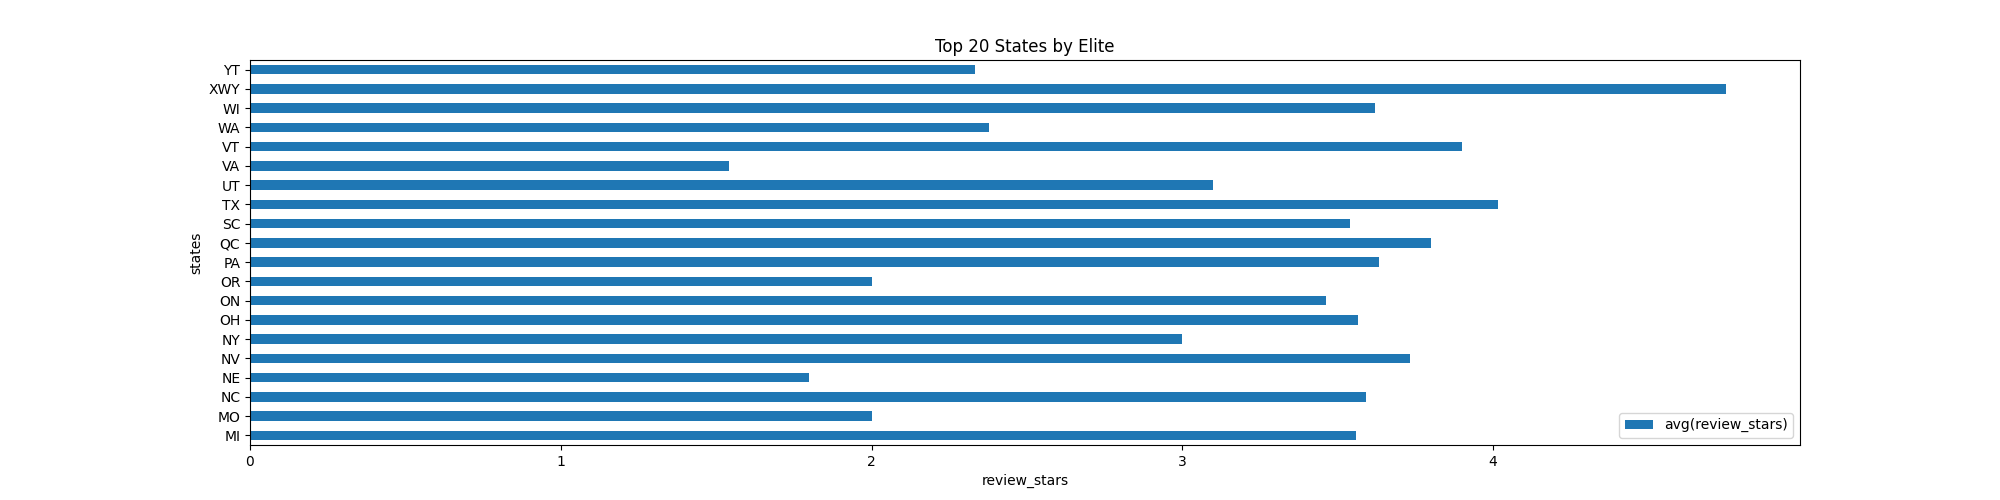

In [112]:
elite_pandas = non_elite.toPandas().set_index('state')

# plot
elite_pandas.plot.barh().invert_yaxis()
plt.title('Top 20 States by Elite')
plt.xlabel("review_stars")
plt.ylabel("states")
plt.rcParams["figure.figsize"] = [20, 5]

%matplot plt